### Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [13]:
df = pd.read_csv('data/gene_expression.csv')


### Feature Engineering

In [ ]:
df.head()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [15]:
len(df.columns)

3

### Observing NaN Features

In [16]:
df.isnull()

Gene One  Gene Two  Cancer Present
0        False     False           False
1        False     False           False
2        False     False           False
3        False     False           False
4        False     False           False
...        ...       ...             ...
2995     False     False           False
2996     False     False           False
2997     False     False           False
2998     False     False           False
2999     False     False           False

[3000 rows x 3 columns]

In [17]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [18]:
100* df.isnull().sum() / len(df)

Gene One          0.0
Gene Two          0.0
Cancer Present    0.0
dtype: float64

## Logistic Regression

In [19]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [20]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

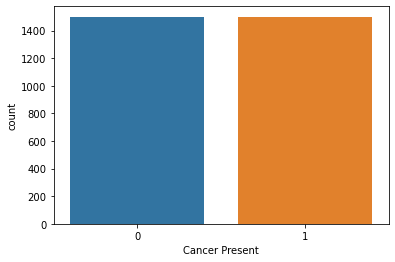

In [21]:
sns.countplot(data=df,x='Cancer Present')

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

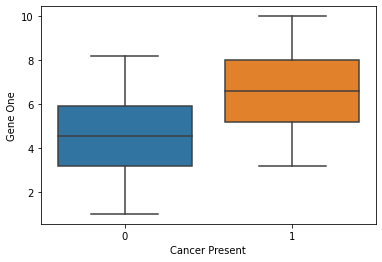

In [22]:
sns.boxplot(x='Cancer Present',y='Gene One',data=df)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

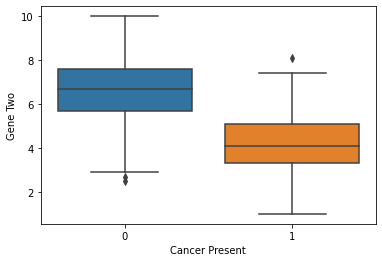

In [23]:
sns.boxplot(x='Cancer Present',y='Gene Two',data=df)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

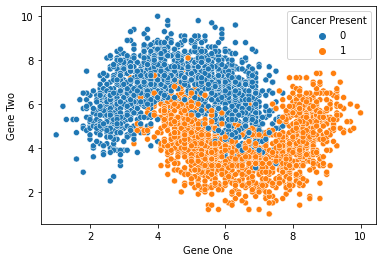

In [24]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present')

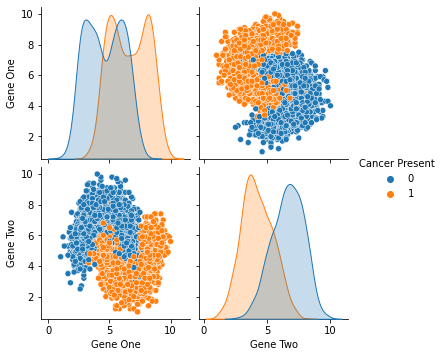

In [25]:
sns.pairplot(df,hue='Cancer Present')

<AxesSubplot:>

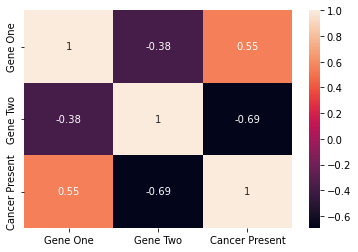

In [26]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Gene One', ylabel='Cancer Present'>

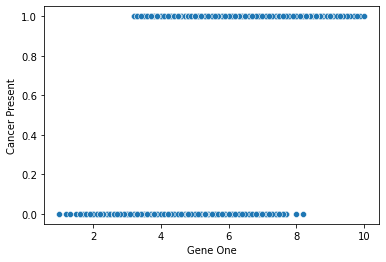

In [27]:
sns.scatterplot(x='Gene One',y='Cancer Present',data=df)

<AxesSubplot:xlabel='Gene Two', ylabel='Cancer Present'>

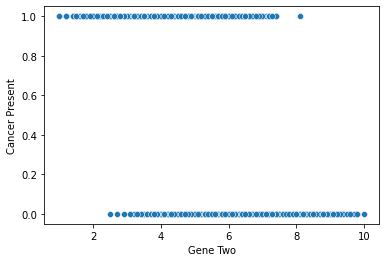

In [28]:
sns.scatterplot(x='Gene Two',y='Cancer Present',data=df)

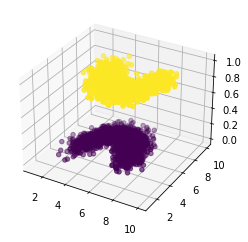

In [29]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'],df['Gene Two'],df['Cancer Present'],c=df['Cancer Present'])

### Train | Test Split and Scaling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler = StandardScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [38]:
log_model.coef_

array([[ 1.1658307 , -2.19487079]])

### Model Performance on Classification Tasks

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [40]:
y_pred = log_model.predict(scaled_X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.8566666666666667

In [42]:
confusion_matrix(y_test,y_pred)

array([[400,  70],
       [ 59, 371]], dtype=int64)

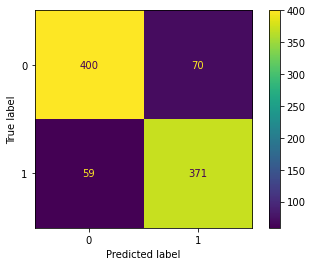

In [43]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

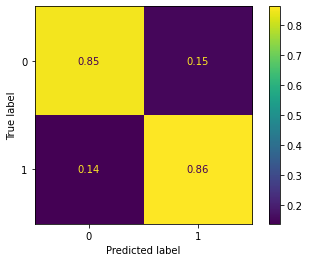

In [44]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       470
           1       0.84      0.86      0.85       430

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



In [46]:
X_train.iloc[0]

0    6.4
1    6.6
Name: 611, dtype: float64

In [47]:
y_train.iloc[0]

0

In [48]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[9.99052945e-01, 9.47055098e-04]])

In [49]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

### Evaluating Curves and AUC


In [50]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

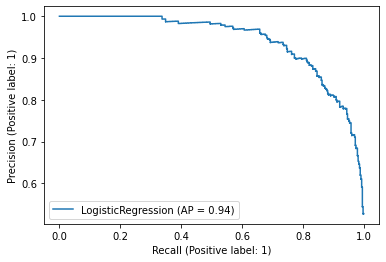

In [51]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

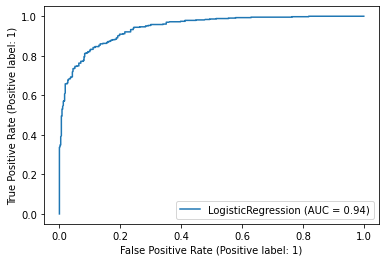

In [52]:
plot_roc_curve(log_model,scaled_X_test,y_test)

## KNN

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

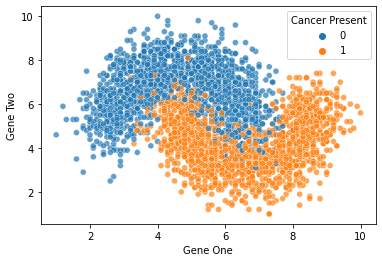

In [53]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

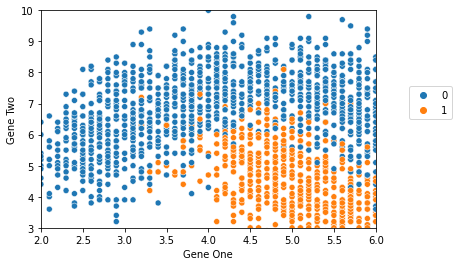

In [54]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

### Train|Test Split and Scaling Data

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
scaler = StandardScaler()

In [59]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [62]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
full_test = pd.concat([X_test,y_test],axis=1, )
full_test.columns = ['Gene One', 'Gene Two', 'Cancer Present']
full_test.head()

Gene One  Gene Two  Cancer Present
1801       7.7       4.1               1
1190       5.3       2.8               1
1817       8.9       4.2               1
251        3.3       5.7               0
2505       4.7       7.3               0

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

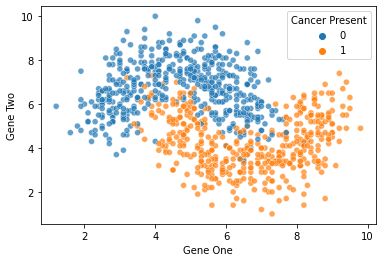

In [74]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

### Model Evaluation

In [75]:
y_pred = knn_model.predict(scaled_X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [77]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [78]:
confusion_matrix(y_test,y_pred)

array([[424,  46],
       [ 43, 387]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(X_test)
plot_confusion_matrix(log_model,X_test,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       470
           1       0.89      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



### Using Elbow Method for Choosing Reasonable K Values

In [80]:
test_error_rates = []


for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

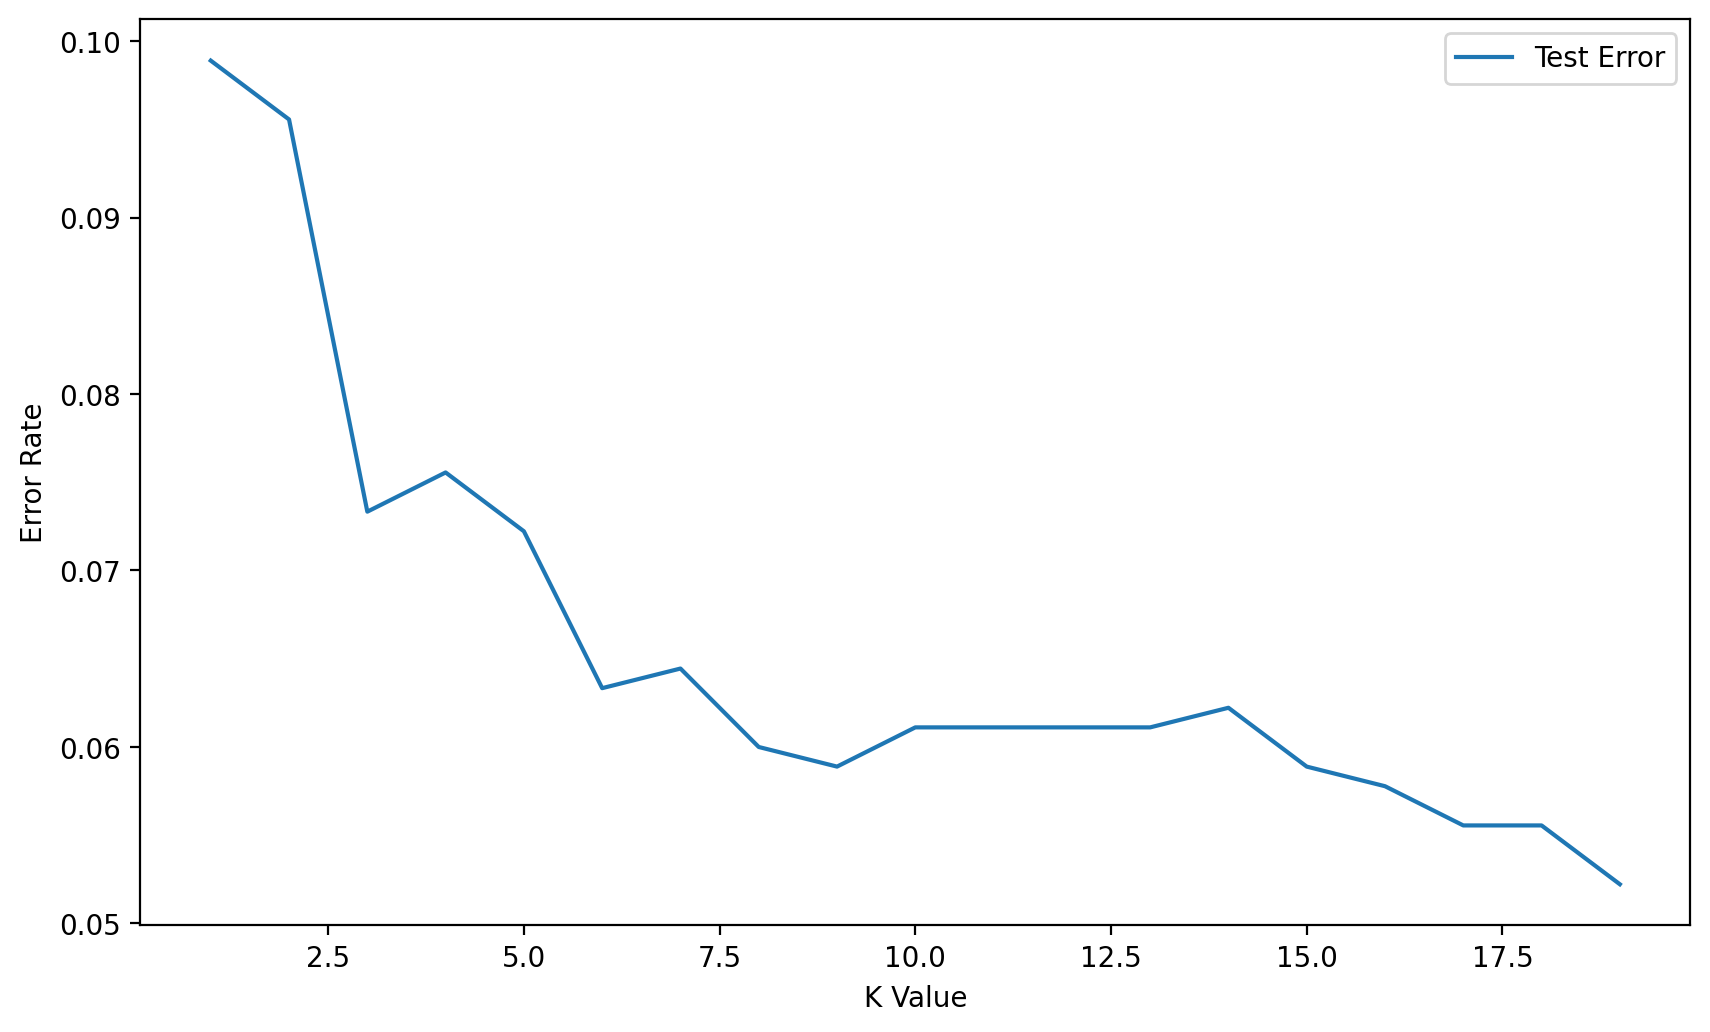

In [81]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Choesen K value is equal to 9

### Final Model

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [84]:
pipe = Pipeline(operations)

In [85]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [86]:
pipe_pred = pipe.predict(X_test)

In [87]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [88]:
single_sample = X_test.iloc[40]

In [89]:
single_sample

0    3.8
1    6.3
Name: 194, dtype: float64

In [90]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0], dtype=int64)

In [91]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[1., 0.]])

# SVM

In [92]:
from sklearn.preprocessing import StandardScaler
def scale(df_train: pd.DataFrame, df_test: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()

    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:, numeric_cols])
    df.loc[:, numeric_cols] = scaler.transform(df.loc[:, numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(
        df_test.loc[:, numeric_cols])
    return df, df_test


In [93]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = df
label = 'Cancer Present'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer



In [94]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')

best_score:0.9320833333333333, params: {'C': 1, 'kernel': 'rbf'}


In [95]:
res = pd.DataFrame(grid.cv_results_)
res


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.039121      0.004046         0.002695        0.000390    0.01   
1       0.040537      0.004894         0.002502        0.000900    0.01   
2       0.033374      0.000956         0.002106        0.000218     0.1   
3       0.032424      0.001430         0.002613        0.000596     0.1   
4       0.041888      0.002458         0.002396        0.000804       1   
5       0.040019      0.011490         0.002109        0.000379       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.845833   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.864583   
2       linear   {'C': 0.1, 'kernel': 'linear'}           0.843750   
3          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.914583   
4       linear     {'C': 1, 'kernel': 'linear'}           0.843750   
5          rbf        {'C': 1, 'kernel': 'rbf'}           0.933333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.875000           0.858333           0.841667            0.85000   
1           0.895833           0.883333           0.872917            0.88125   
2           0.872917           0.858333           0.843750            0.85000   
3           0.931250           0.920833           0.918750            0.91250   
4           0.864583           0.856250           0.845833            0.85000   
5           0.937500           0.933333           0.937500            0.91875   

   mean_test_score  std_test_score  rank_test_score  
0         0.854167        0.011785                4  
1         0.879583        0.010491                3  
2         0.853750        0.010977                5  
3         0.919583        0.006535                2  
4         0.852083        0.007569                6  
5         0.932083        0.006922                1

In [96]:
ans = grid.predict(X_test)


In [97]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1 - err
print(err, acc)


0.06166666666666667 0.9383333333333334


In [98]:
print(f'Acheived accuracy: {acc}')


Acheived accuracy: 0.9383333333333334


In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [100]:
confusion_matrix(y_test,ans)

array([[271,  20],
       [ 17, 292]], dtype=int64)

In [101]:
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       291
           1       0.94      0.94      0.94       309

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

